# Librerías

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Punto 3
- - -
#### a) ¿Cuál es la probabilidad de que alguien esté suscrito a alguno de los dos servicios?

$\mathbb P(D\cup C)=\mathbb P(D)+\mathbb P(C)-\mathbb P(D\cap C)=0.6+0.8-0.5= 0.9$.

La probabilidad es del 90%.

#### b) ¿Cuál es la probabilidad que esté suscrito al diario o al cable, pero no a ambos servicios?

$\mathbb P((A \cap B^c) \cup (B \cap A^c)) = \mathbb P(A \cap B^c)+\mathbb P(B \cap A^c)-\mathbb P((A\cap B^c)\cap(B\cap A^c))=\mathbb P(A)\mathbb P(B^c)+\mathbb P(B)\mathbb P(A^c)-\mathbb P(A)\mathbb P(B^c)\mathbb P(B)\mathbb P(A^c) = (0.6)(0.2)+(0.8)(0.4)-(0.6)(0.2)(0.8)(0.4)\approx 0.4$.

La probabilidad es del 40%.

# Punto 4
- - -

In [2]:
def Probabilidad(n):
    if 365 >= n:
        fav = 365
        pos = 365
        prob = 1
        for i in range(int(n)):
            prob *= fav/pos
            fav -= 1
        return prob

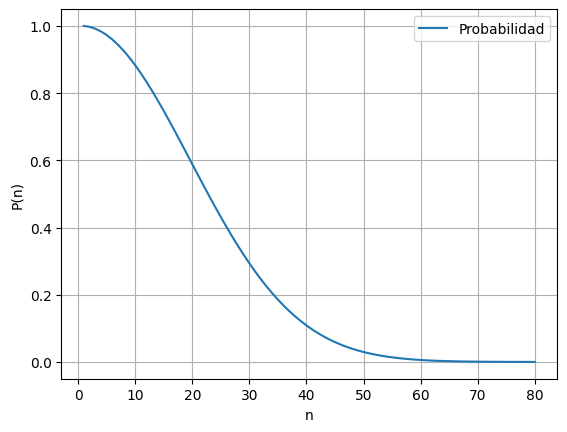

In [3]:
N = np.linspace(1,80,80)
P = np.zeros((80))

for j in range(80):
    P[j] = Probabilidad(N[j])
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(N,P,label="Probabilidad")
ax.set_xlabel("n")
ax.set_ylabel("P(n)")
ax.grid()
ax.legend()

# Punto 8
- - -
Al lanzar 4 monedas, se tienen 2 casos en cada una de ellas. Por lo que la cantidad de posibilidades conjuntas es $2^4=16$. De las cuales 6 casos cumplen la condición propuesta por el enunciado. Luego, $\mathbb P (A)=\frac{6}{16}=\frac{3}{8}=0.375$.

In [4]:
pos = [-1,1]
casos = 0

for i in range(int(10e5)):
    p1 = np.random.choice(pos)
    p2 = np.random.choice(pos)
    p3 = np.random.choice(pos)
    p4 = np.random.choice(pos)

    if p1+p2+p3+p4 == 0:
        casos += 1
            
casos/int(10e5)

0.375443

# Punto 9
- - -

### Probabilidad teórica

In [5]:
p1 = sp.Symbol("p1", Real=True)
p2 = sp.Symbol("p2", Real=True)

In [6]:
prob1 = 3*p1*0.5*0.5*0.5
prob2 = 3*(1-p1)*0.5*0.5*0.5
probTot = prob1+prob2
probTot

0.375000000000000

### Probabilidad Truncada

In [7]:
def ProbTruncada(P1,P2,N):
    probTot = (p1*p2*0.5*0.5) + 2*(p1*(1-p2)*0.5*0.5) + 2*((1-p1)*p2*0.5*0.5) + ((1-p1)*(1-p2)*0.5*0.5) 
    P = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            P[i,j] = probTot.subs(p1,P1[i]).subs(p2,P2[j])
    
    return P

In [8]:
N = 25
P1 = np.linspace(0.1,0.9,N)
P2 = np.linspace(0.1,0.5,N)   
P = ProbTruncada(P1,P2,N)

In [9]:
max = np.where(np.amax(P)==P)
min = np.where(np.amin(P)==P)
i,j = int(max[0]),int(max[1])
k,l = int(min[0]),int(min[1])

print("Máxima:",P[i,j],", Prob 1:",P1[i],", Prob 2:",P2[j])
print("Mínima:",P[k,l],", Prob 1:",P1[k],", Prob 2:",P2[l])

Máxima: 0.45499999999999996 , Prob 1: 0.9 , Prob 2: 0.1
Mínima: 0.29500000000000004 , Prob 1: 0.1 , Prob 2: 0.1


### Gráfica

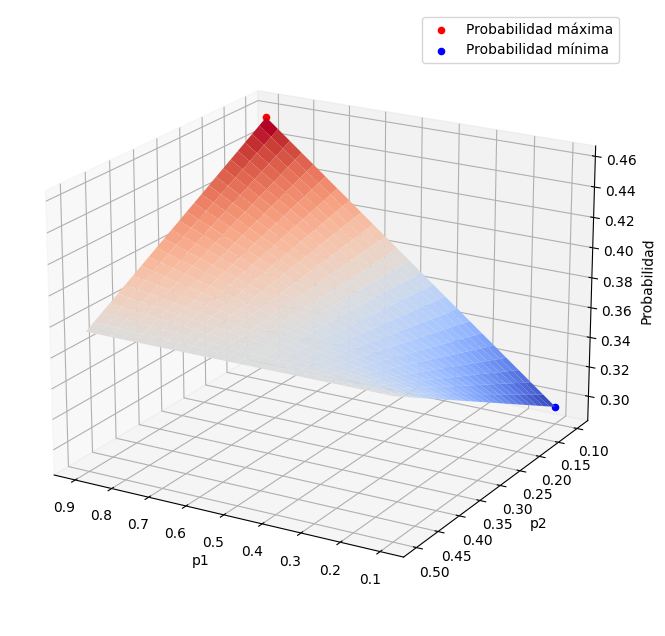

In [10]:
X,Y=np.meshgrid(P1,P2)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("p1")
ax.set_ylabel("p2")
ax.set_zlabel("Probabilidad")
surf = ax.plot_surface(X, Y, P.T, cmap="coolwarm",)
ax.scatter(P1[i],P2[j],P[i,j],c="r",label="Probabilidad máxima")
ax.scatter(P1[k],P2[l],P[k,l],c="blue",label="Probabilidad mínima")
ax.view_init(20, 120)
ax.legend()